In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('train.csv')
test = pd.read_csv('tested.csv')

In [2]:
from sklearn.datasets import load_iris
import numpy as np
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.left = None
        self.right = None
        self.feature_index = 0
        self.threshold = 0
        
def gini_impurity(y):
    instances = np.bincount(y)
    total = np.sum(instances)
    p = instances/total
    return 1.0 - np.sum(np.power(p,2)) 


class Cart_Tree:
    def __init__(self, max_depth, acceptable_impurity):
        self.max_depth = max_depth
        self.acceptable_impurity = acceptable_impurity
        
        
    def predict(self, df):
        predictions = []
        for index, row in df.iterrows():
            prediction = self._predict_row(row)
            predictions.append(prediction)
        return predictions
    
        
    def _predict_row(self, inputs):
        current_node = self.tree
        while current_node.left:
            if inputs[current_node.feature_index] < current_node.threshold:
                current_node = current_node.left
            else:
                current_node = current_node.right
        return current_node.predicted_class
        
    def fit(self, x, y):
        self.classifications = len(set(y))
        self.features = x.shape[1]
        self.tree = self.create_tree(x, y)
        
  
        
    def cart_split(self, x, y):
        m = y.size
        if m <= 1:
            return None, None
        best_index = None
        best_threshold = None
        samples_class = [np.sum(y == c) for c in range(self.classifications)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in samples_class)

        if best_gini >= self.acceptable_impurity:
            for index in range(self.features):
                thresholds, classes = zip(*sorted(zip(x[:, index], y)))
                num_left = [0] * self.classifications
                num_right = samples_class.copy()
                for i in range(1, m):
                    c = classes[i - 1]
                    num_left[c] += 1
                    num_right[c] -= 1
                    gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.classifications))
                    gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.classifications))
                    gini = (i * gini_left + (m - i) * gini_right) / m
                    if thresholds[i] == thresholds[i - 1]:
                        continue
                    if gini < best_gini:
                        best_gini = gini
                        best_index = index
                        best_threshold = (thresholds[i] + thresholds[i - 1]) / 2
        return best_index, best_threshold
    
    def create_tree(self, x, y, depth=0):
        samples_class = [np.sum(y == c) for c in range(self.classifications)]
        predicted_class = np.argmax(samples_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            index, thr = self.cart_split(x, y)
            if index is not None:
                indices_left = x[:, index] < thr
                x_left = x[indices_left]
                y_left = y[indices_left]
                x_right = x[~indices_left]
                y_right = y[~indices_left]
                node.feature_index = index
                node.threshold = thr
                node.left = self.create_tree(x_left, y_left, depth + 1)
                node.right = self.create_tree(x_right, y_right, depth + 1)
        return node

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


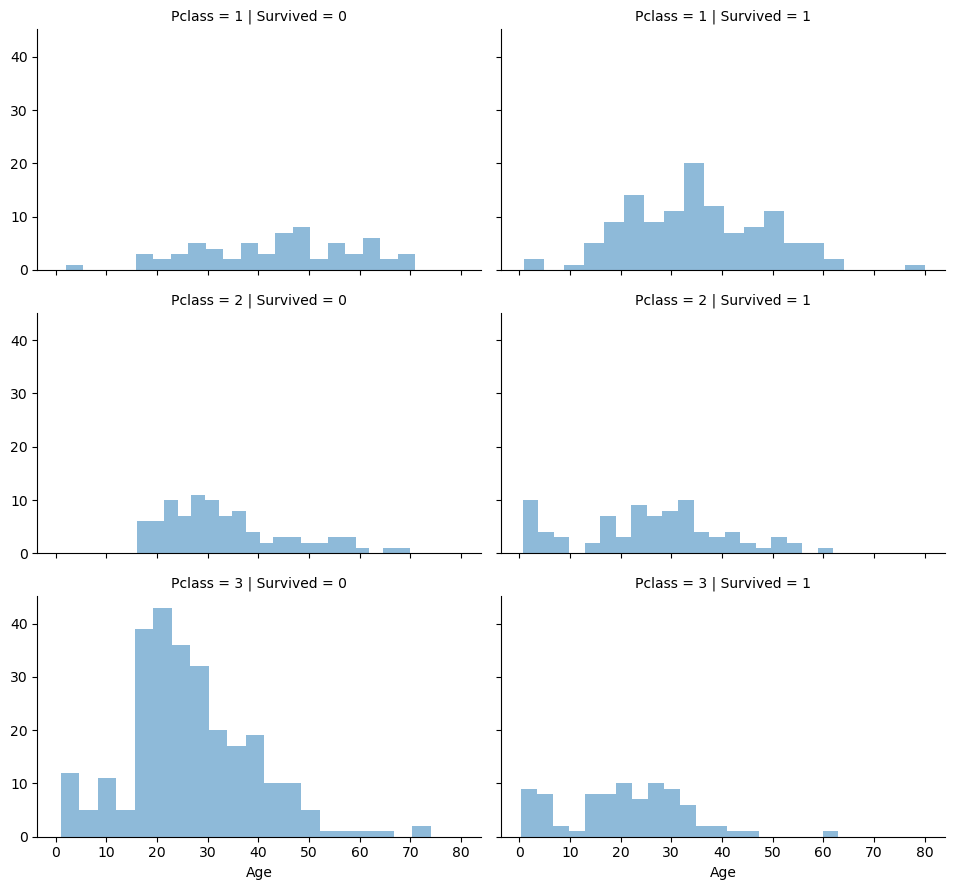

In [7]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


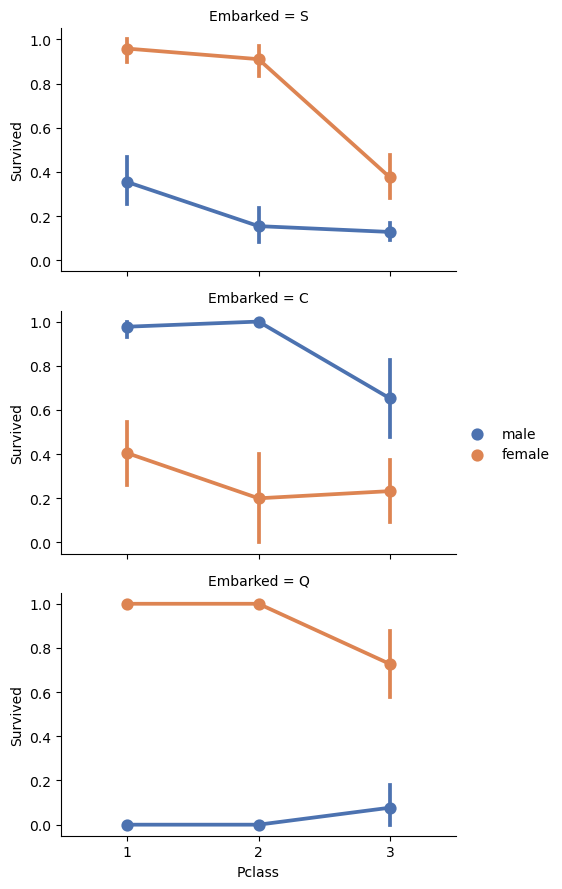

In [8]:
grid = sns.FacetGrid(train, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


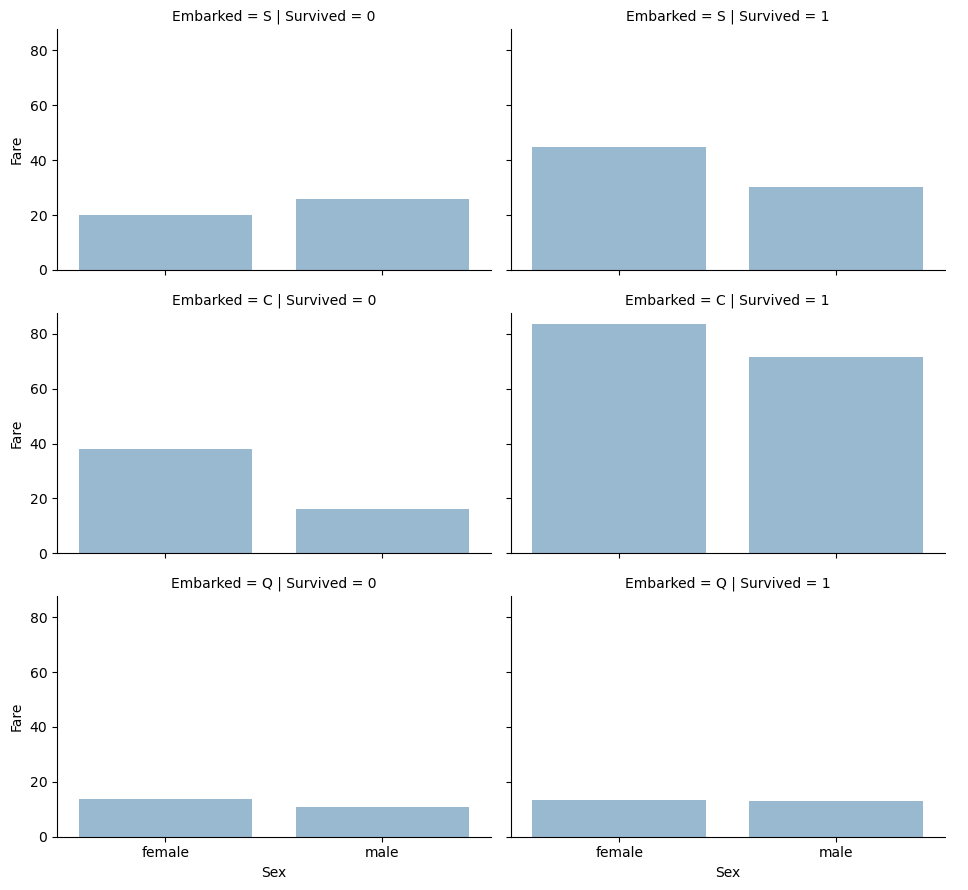

In [9]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None)
grid.add_legend()

In [10]:
train.drop('Cabin', axis=1, inplace = True)
test.drop('Cabin', axis=1, inplace = True)

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29
        else:
            return 24

    else:
        return Age

In [12]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [15]:
sexTrain =pd.get_dummies(train['Sex'], drop_first = True)
sexTest =pd.get_dummies(test['Sex'], drop_first = True)

In [16]:
sexTrain

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [17]:
embarkTrain = pd.get_dummies(train['Embarked'], drop_first = True)
embarkTest = pd.get_dummies(test['Embarked'], drop_first = True)

In [18]:
embarkTrain

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [19]:
train = pd.concat([train,sexTrain,embarkTrain], axis = 1)
test =  pd.concat([test,sexTest,embarkTest], axis = 1)

In [20]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True,False,False


In [21]:
train['Name'].apply(lambda s : s.split(',')[1].split('.')[0])
test['Name'].apply(lambda s : s.split(',')[1].split('.')[0])

0           Mr
1          Mrs
2           Mr
3           Mr
4          Mrs
        ...   
413         Mr
414       Dona
415         Mr
416         Mr
417     Master
Name: Name, Length: 418, dtype: object

In [22]:
def impute_name(name):
    if(name==' Mr'):
        return 1
    elif(name==' Miss'):
        return 2
    elif(name==' Mrs'):
        return 3
    elif(name==' Master'):
        return 4
    elif(name==' Dr'):
        return 5
    else:
        
        return 0

In [23]:
train['Name']=train['Name'].apply(lambda s : s.split(',')[1].split('.')[0]).apply(impute_name)
test['Name']=test['Name'].apply(lambda s : s.split(',')[1].split('.')[0]).apply(impute_name)

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    int64  
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
 11  male         418 non-null    bool   
 12  Q            418 non-null    bool   
 13  S            418 non-null    bool   
dtypes: bool(3), float64(2), int64(6), object(3)
memory usage: 37.3+ KB


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  male         891 non-null    bool   
 12  Q            891 non-null    bool   
 13  S            891 non-null    bool   
dtypes: bool(3), float64(2), int64(6), object(3)
memory usage: 79.3+ KB


In [26]:
rows_with_nan = []
for index, row in test.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

print(rows_with_nan)

[152]


In [27]:
test.iloc[152,9] = test['Fare'].median()

In [28]:
train.drop(['Ticket','Sex', 'Embarked'], axis=1, inplace=True)
test.drop(['Ticket','Sex', 'Embarked'], axis=1, inplace=True)

In [29]:
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

In [30]:
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [31]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,24.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [32]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,True,True,False
1,1,3,47.0,1,0,7.0000,False,False,True
2,0,2,62.0,0,0,9.6875,True,True,False
3,0,3,27.0,0,0,8.6625,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...
413,0,3,24.0,0,0,8.0500,True,False,True
414,1,1,39.0,0,0,108.9000,False,False,False
415,0,3,38.5,0,0,7.2500,True,False,True
416,0,3,24.0,0,0,8.0500,True,False,True


In [33]:
X_train = train.drop('Survived', axis=1)
y_train= train['Survived']
X_test = test.drop('Survived', axis=1)
y_test = test['Survived']
X_train.values

array([[3, 22.0, 1, ..., True, False, True],
       [1, 38.0, 1, ..., False, False, False],
       [3, 26.0, 0, ..., False, False, True],
       ...,
       [3, 24.0, 1, ..., False, False, True],
       [1, 26.0, 0, ..., True, False, False],
       [3, 32.0, 0, ..., True, True, False]], dtype=object)

In [37]:
tree = Cart_Tree(max_depth=30, acceptable_impurity=0.2)
tree.fit(X_train.values, y_train.values)
predictions = tree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[243  23]
 [ 38 114]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       266
           1       0.83      0.75      0.79       152

    accuracy                           0.85       418
   macro avg       0.85      0.83      0.84       418
weighted avg       0.85      0.85      0.85       418



In [ ]:
tree.predict(pd.DataFrame([[1,39.0,0,0,108.9000,False,False,False]]))

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[209  57]
 [ 37 115]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       266
           1       0.67      0.76      0.71       152

    accuracy                           0.78       418
   macro avg       0.76      0.77      0.76       418
weighted avg       0.78      0.78      0.78       418



In [35]:
predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(round(rfc.score(X_train, y_train)*100, 2))

[[225  41]
 [ 39 113]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       266
           1       0.73      0.74      0.74       152

    accuracy                           0.81       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.81      0.81      0.81       418

98.2


In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(round(logmodel.score(X_train, y_train)*100, 2))

[[251  15]
 [ 13 139]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.90      0.91      0.91       152

    accuracy                           0.93       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418

80.81


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=1


[[179  87]
 [ 72  80]]


              precision    recall  f1-score   support

           0       0.71      0.67      0.69       266
           1       0.48      0.53      0.50       152

    accuracy                           0.62       418
   macro avg       0.60      0.60      0.60       418
weighted avg       0.63      0.62      0.62       418



In [43]:

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

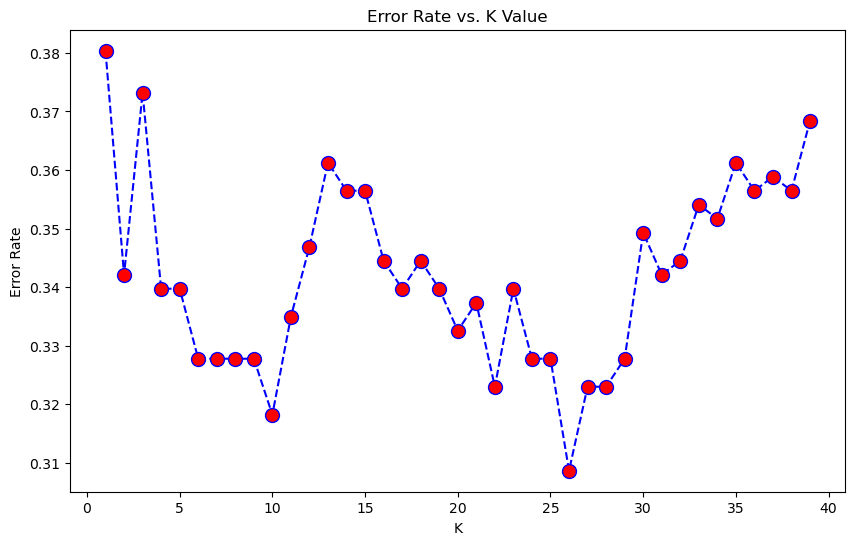

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=26')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=26


[[222  44]
 [ 85  67]]


              precision    recall  f1-score   support

           0       0.72      0.83      0.77       266
           1       0.60      0.44      0.51       152

    accuracy                           0.69       418
   macro avg       0.66      0.64      0.64       418
weighted avg       0.68      0.69      0.68       418



In [47]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(round(clf.score(X_train, y_train)*100, 2))

[[233  33]
 [111  41]]
              precision    recall  f1-score   support

           0       0.68      0.88      0.76       266
           1       0.55      0.27      0.36       152

    accuracy                           0.66       418
   macro avg       0.62      0.57      0.56       418
weighted avg       0.63      0.66      0.62       418

68.24
